# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 8</span>


During this exercise you will variationally optimize the ground state of a single quantum particle in a one dimensional (1D) space confined by the following external potential:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

This 1D quantum model is not analytically solvable and should be attacked by numerical methods. In order to obtain an approximate wave function for the ground state, the Variational Monte Carlo method uses a trial wave function, parametrized by a set of variational parameters. An approximate model for the ground state wave function is the following trial wave function:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

$\Psi_T^{\sigma,\mu}(x)$ depends on two variational parameters, $\sigma$, which is the width of the two Gaussians under square root, and $\mu$, which represents the distance from the origin of their average values.

### Exercise 08.1

Write a C++ Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample a trial wave function $|\Psi_T(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$ (Suggestion: as a starting point, you can use the code you have already developed for the Hydrogen atom or the Monte Carlo NVT code). Using data blocking, the code should be able to compute the expectation value for the Hamiltonian

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

which can be used to find the parameters that minimize this quantity.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Exercise 08.2

Use your Variational Monte Carlo code to find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$:

$$
\langle {\hat H} \rangle_T = \frac{\langle \Psi_T^{\sigma,\mu}| {\hat H} | \Psi_T^{\sigma,\mu} \rangle}
{\langle \Psi_T^{\sigma,\mu} | \Psi_T^{\sigma,\mu} \rangle} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

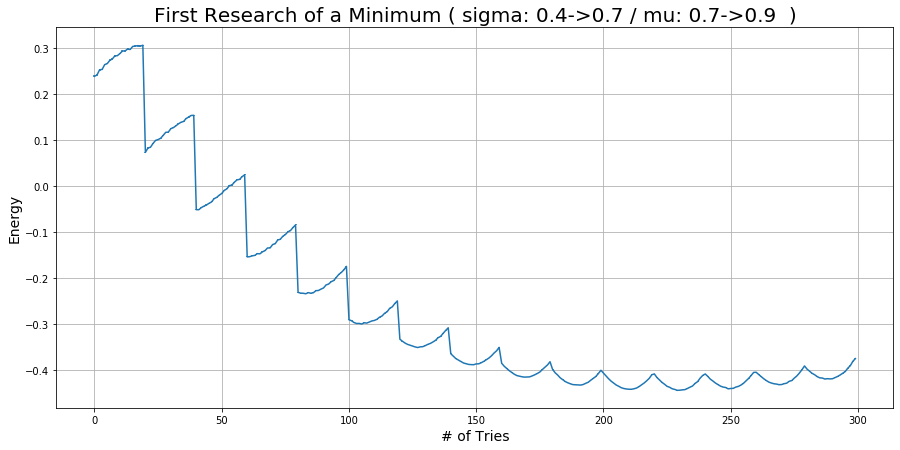

In [2]:
fullH = np.loadtxt('es8.final/FirstMin/H.out')
H = []
err = []
for elem in fullH:
    H.append(elem[2])
    err.append(elem[3])

m = min(H)
index = H.index(m)    

H=np.asarray(H)
err=np.asarray(err)
    
mu_min = fullH[index][0]
sigma_min = fullH[index][1]


fig = plt.figure(figsize=(15,7))

x = np.arange(len(H))

for elem in err:
    if(type(elem) != type(err[0])):
        print('tipo diverso')

ax1 = fig.add_subplot(111)

ax1.errorbar(x,H,yerr = err)
ax1.set_title("First Research of a Minimum ( sigma: 0.4->0.7 / mu: 0.7->0.9  )",fontsize = 20)
ax1.set_ylabel("Energy",fontsize=14)
ax1.set_xlabel("# of Tries",fontsize=14)
ax1.grid()

In [3]:
print('mu_min= '+str(mu_min)+'\n' + 'sigma_min= ' +str(sigma_min))
print('E_0  = ' + str(H[index]) + ' +/- ' + str(err[index]))

mu_min= 0.79
sigma_min= 0.62
E_0  = -0.444649 +/- 0.000363392


### Each big jump is a change in $\sigma$, while in each "chunk" it is $\mu$ that varies.<br> The above graph, united with the absolute minimum printed below it, indicate the zone in which to perform the next search.

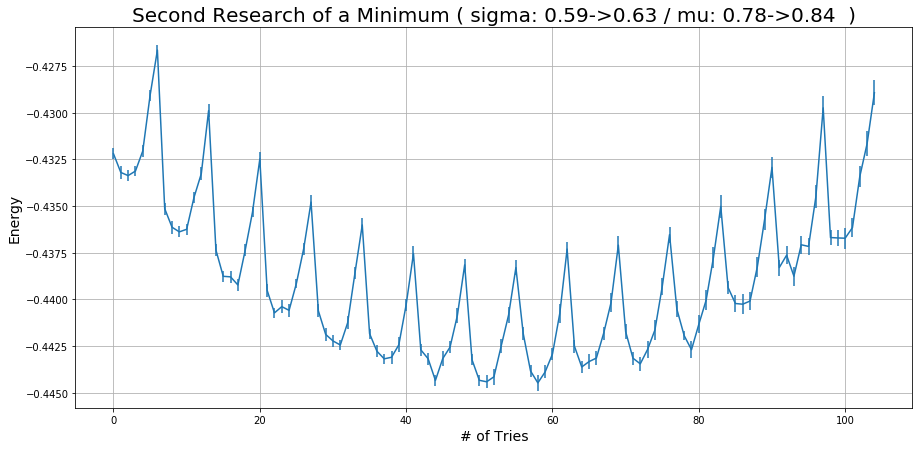

In [4]:
fullH = np.loadtxt('es8.final/SecondMin/H.out')
H = []
err = []
for elem in fullH:
    H.append(elem[2])
    err.append(elem[3])

m = min(H)
index = H.index(m)    

H=np.asarray(H)
err=np.asarray(err)
    
mu_min = fullH[index][0]
sigma_min = fullH[index][1]


fig = plt.figure(figsize=(15,7))

x = np.arange(len(H))

for elem in err:
    if(type(elem) != type(err[0])):
        print('tipo diverso')

ax1 = fig.add_subplot(111)

ax1.errorbar(x,H,yerr = err)
ax1.set_title("Second Research of a Minimum ( sigma: 0.59->0.63 / mu: 0.78->0.84  )",fontsize = 20)
ax1.set_ylabel("Energy",fontsize=14)
ax1.set_xlabel("# of Tries",fontsize=14)
ax1.grid()

In [5]:
print('mu_min= '+str(mu_min)+'\n' + 'sigma_min= ' +str(sigma_min))
print('E_0  = ' + str(H[index]) + ' +/- ' + str(err[index]))

mu_min= 0.8
sigma_min= 0.62
E_0  = -0.444471 +/- 0.000408431


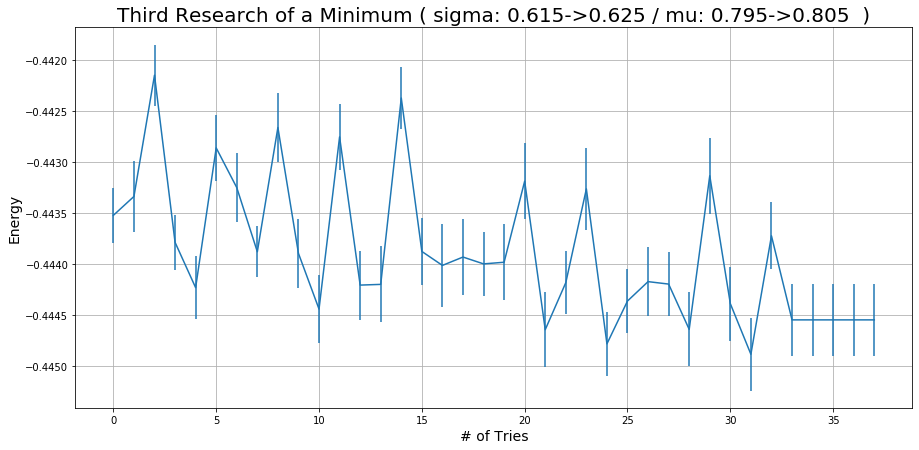

In [6]:
fullH = np.loadtxt('es8.final/H.out')
H = []
err = []
for elem in fullH:
    H.append(elem[2])
    err.append(elem[3])

m = min(H)
index = H.index(m)    

H=np.asarray(H)
err=np.asarray(err)
    
mu_min = fullH[index][0]
sigma_min = fullH[index][1]


fig = plt.figure(figsize=(15,7))

x = np.arange(len(H))

for elem in err:
    if(type(elem) != type(err[0])):
        print('tipo diverso')

ax1 = fig.add_subplot(111)

ax1.errorbar(x,H,yerr = err)
ax1.set_title("Third Research of a Minimum ( sigma: 0.615->0.625 / mu: 0.795->0.805  )",fontsize = 20)
ax1.set_ylabel("Energy",fontsize=14)
ax1.set_xlabel("# of Tries",fontsize=14)
ax1.grid()

- As usual, <span style="color:red">show a picture of the estimation of $\langle {\hat H} \rangle_T$ </span> and its statistical uncertainty as a function of the number of blocks/MC steps for the set of parameters which minimize $\langle {\hat H} \rangle_T$
- <span style="color:red">show also a picture **of the sampled** $|\Psi_T(x)|^2$</span> by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation (see below).

### At the end of the third search, the parameters chose to minimize energy are <br> $$\begin{align} \sigma = 0.617 && \mu = 0.802 \end{align}$$
**As one can easily see from the last graph above, at this level of precision there is no one definite minimum. Because of statistical uncertainties, many choices of the parameters could have been made. The graph below in fact show that the chosen wavefunction is fairly accurate, but still evidently different from the ones computed with more sophisticated methods**

In [7]:
H = np.loadtxt('es8.final/LastRun/insta.out')

N = len(H)
M = 50
L = int(N/M)

H_ave= np.zeros(M) 
prog_H= np.zeros(M)
prog_H2=np.zeros(M)
err_H=np.zeros(M)

for iblock in range(M): #blocking average
    for istep in range(L):
        H_ave[iblock]+= H[L*iblock + istep]
    H_ave[iblock]/=L
    for i in range(0,iblock+1):
        prog_H[iblock]+=H_ave[i]
        prog_H2[iblock]+=H_ave[i]**2
    prog_H[iblock]/=(iblock+1)
    prog_H2[iblock]/=(iblock+1)
    err_H[iblock] = np.sqrt((prog_H2[iblock]-prog_H[iblock]**2)/(iblock+1))

x = np.arange(1,M+1)

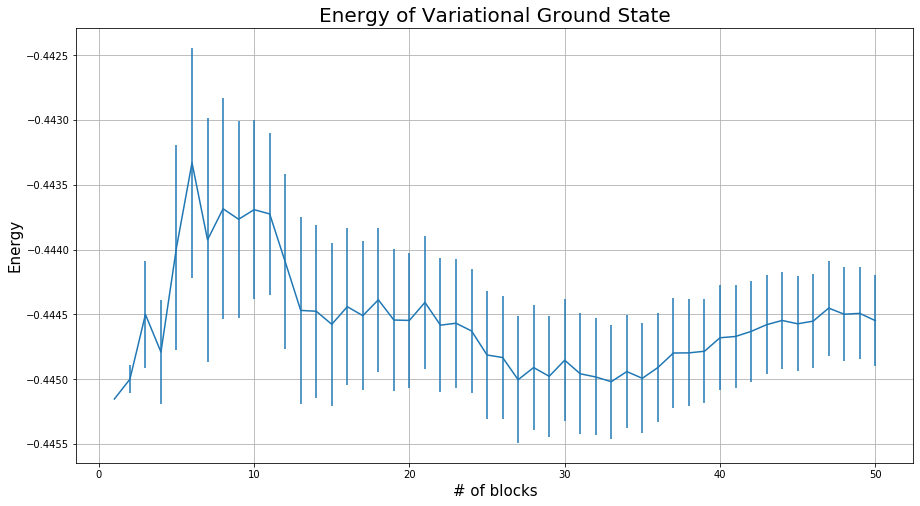

In [8]:
fig = plt.figure(figsize=(15,8))

ax1 = fig.add_subplot(111)
ax1.errorbar(x,prog_H,yerr = err_H)
ax1.set_title('Energy of Variational Ground State',fontsize = 20)
ax1.set_xlabel('# of blocks',fontsize = 15)
ax1.set_ylabel('Energy',fontsize = 15)
ax1.grid()


plt.show()

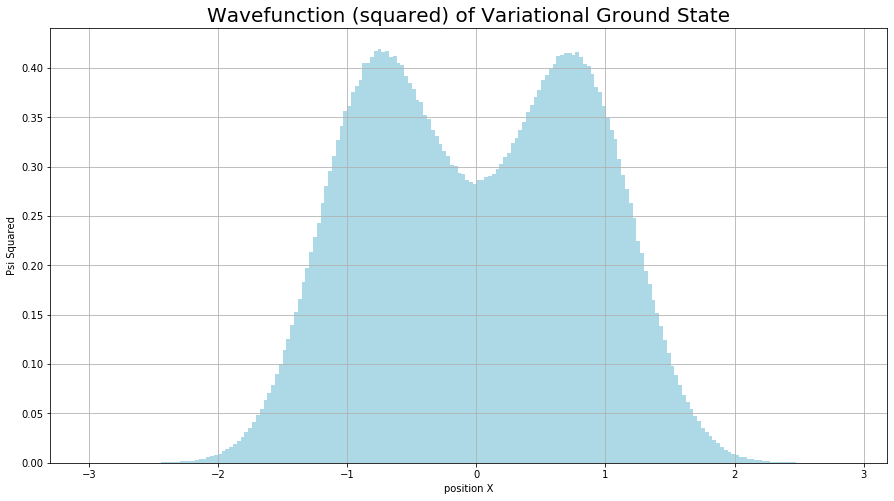

In [9]:
pos = np.loadtxt('es8.final/pos.out')
#x = np.linspace(-3,3,len(pos))

fig = plt.figure(figsize=(15,8))

ax1 = fig.add_subplot(111)
ax1.set_title("Wavefunction (squared) of Variational Ground State", fontsize = 20)
ax1.set_xlabel("position X")
ax1.set_ylabel("Psi Squared")
ax1.hist(pos,bins = 200,density = True,color = 'lightblue')
plt.grid()

### Exercise 08.3

Use the PIMC/PIGS code we have provided to study the same 1D quantum system. Use the PIGS algorithm ($T=0$) to project
- a constant trial wave function, $\Psi_T(x)=1$
- using $\Psi_T(x) = \Psi_T^{\sigma,\mu}(x)$ with the variational parameters you have optimized.

<span style="color:red">Compare your results with those obtained with your VMC code</span>. By using $\Psi_T^{\sigma,\mu}(x)$, how much can you reduce the imaginary time propagation with respect to the first case?

<span style="color:red">Finally, use the PIMC algorithm ($T>0$) to observe how the histogram with the sampled configurations changes by increasing the temperature.</span>

### Supplementary material

How can we describe a wave function as a vector? We set up a lattice of discrete points, spaced by a constant distance $dx$, and record the value of the function at each lattice point. In this way the wave function, $\Psi(x)$ become a vector:

$$
\Psi(x) \to \left[ \Psi(x_1), \Psi(x_2), ..., \Psi(x_N) \right] = 
\left[ \Psi_1, \Psi_2, ..., \Psi_N \right]
$$

The time independent Schrodinger equation 

$$
{\hat H} \Psi(x) = \left( -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} + V(x) \right) \Psi(x) = E \Psi(x)
$$

can be written in matrix form. But how do we write the second derivative at a particular point? Let's start with the first derivatives:
$$
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) \simeq \frac{\Psi_{i+1}-\Psi_{i}}{dx}\\
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right) \simeq \frac{\Psi_{i}-\Psi_{i-1}}{dx}
$$

Thus, we can discretize the second derivative in the following way:
$$
\frac{\partial^2}{\partial x^2} \Psi(x=x_i) =
\frac{\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) - \frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right)}{dx} =
\frac{\Psi_{i+1}-2\Psi_{i}+\Psi_{i-1}}{dx^2}
$$

We finally obtain:

$$
\begin{bmatrix}
 \frac{\hbar^2}{m\,dx^2}+V(x_1)& -\frac{\hbar^2}{2m\,dx^2} & 0 & \dots  & 0 \\
-\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_2) & -\frac{\hbar^2}{2m\,dx^2} & \dots  & 0 \\
 0                        & -\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_3) & \dots  & 0 \\
 \vdots                   & \vdots                    & \vdots & \ddots & \vdots \\
 0                    & 0                & 0 & \dots  & \frac{\hbar^2}{m\,dx^2}+V(x_N)
\end{bmatrix}
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
= E
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
$$

To solve the time independent Schrodinger equation we therefore have to find eigenstates and eigenvalues of the matrix just obtained.

Ground state energy:  -0.46046587969271563
1st excited state energy:  0.0974247133176099
2nd excited state energy:  1.971733134393021


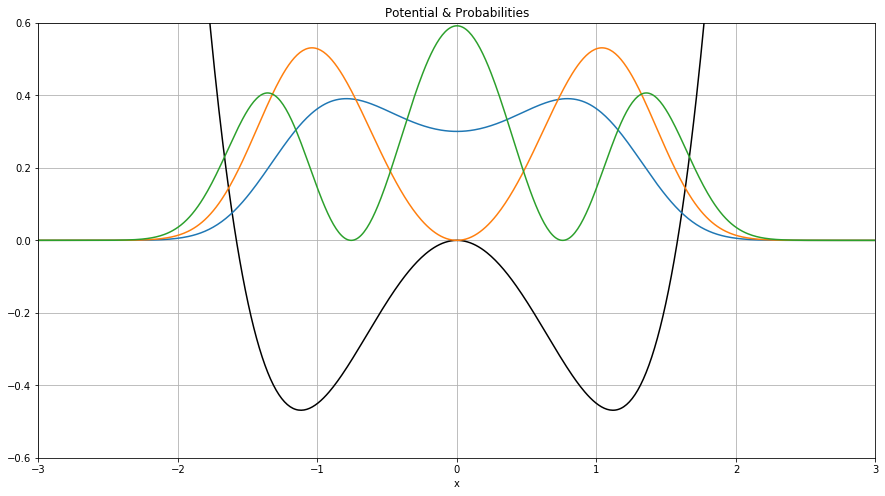

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(15,8))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2)
plt.plot(x,(psi[1])**2)
plt.plot(x,(psi[2])**2)
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.show()

OSError: QMC_1D/probability.dat not found.

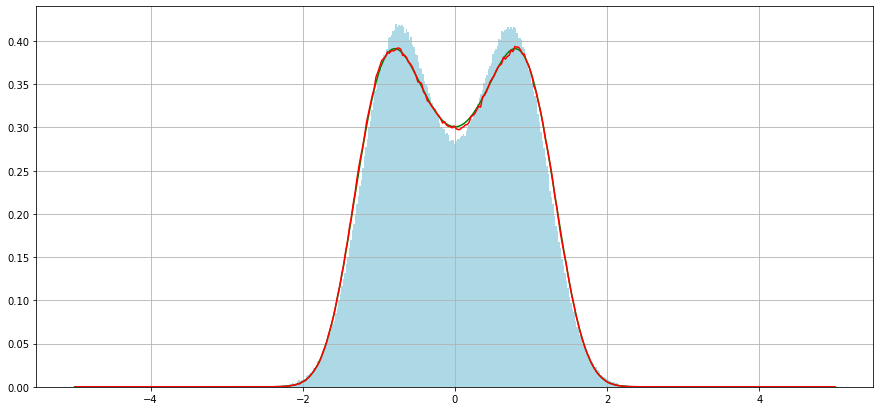

In [11]:
plt.figure(figsize=(15,7))

x = np.linspace(-a/2, a/2, N)
plt.plot(x,(psi[0])**2,color = 'green')

x2 = np.linspace(-3,3,len(pos))
plt.hist(pos,bins = 300,density = True, color = 'lightblue')
plt.grid()

prob_const = np.loadtxt('QMC_1D/probability.00')
plt.plot(prob_const[:,0],prob_const[:,1],color = 'red')

prob_var = np.loadtxt('QMC_1D/probability.dat')
plt.plot(prob_var[:,0],prob_var[:,1],color = 'purple')



plt.grid()

plt.legend(['Hamiltionian Matrix Wavefunction','PIGS Wave function -  start from constant - T = 8.0',
            'PIGS Wave function - start from variational - T = 8.0','Variational Wave function'],fontsize = 14)

plt.show()

In [ ]:
fig = plt.figure(figsize = (16,7))
ax1 = fig.add_subplot(121)
ax1.plot(x,(psi[0])**2,color = 'black')
for n in range(5):
    prob = np.loadtxt('QMC_1D/Const/probability.0'+str(n))
    ax1.plot(prob[:,0],prob[:,1])
ax1.legend(['Matrix Wavefunction','t = 0.05','t = 0.1', 't = 0.5', 't = 1.0', 't= 3.0'])
ax1.set_title('PIGS Wavefunctions - Start from Constant',fontsize = 18)


ax2 = fig.add_subplot(122)
ax2.plot(x,(psi[0])**2,color = 'black')
for n in range(5):
    prob = np.loadtxt('QMC_1D/Trial/probability.0'+str(n))
    ax2.plot(prob[:,0],prob[:,1])
ax2.legend(['Matrix Wavefunction','t = 0.05','t = 0.1', 't = 0.5', 't = 1.0', 't= 3.0'])
ax2.set_title('PIGS Wavefunctions - Start from Variational Trial',fontsize = 18)

plt.show()

**As the above graph shows (t is the imaginary time), starting from the previously found trial wavefunction makes convergence to the (almost) exact solution much quicker**

In [ ]:
pot = np.loadtxt('QMC_1D/potential.00')
kin = np.loadtxt('QMC_1D/kinetic.00')
x = np.arange(len(pot))
fig = plt.figure(figsize = (16,7))
fig.suptitle("PIGS simulation - Constant trial wavefunction - T = 8.0", fontsize = 26)


ax1 = fig.add_subplot(121)
ax1.errorbar(pot[:,0],pot[:,1],pot[:,2])
ax1.errorbar(kin[:,0],kin[:,1],kin[:,2])

tot = pot + kin

ax1.errorbar(tot[:,0]/2,tot[:,1],tot[:,2])
ax1.legend(['Potential Energy','Kinetic Energy','Total Energy'])
ax1.set_ylabel('Energy',fontsize = 15)

pot_short = np.asarray([pot[i] for i in range(120,180)])
kin_short = np.asarray([kin[i] for i in range(120,180)])
ax2 = fig.add_subplot(122)
ax2.errorbar(pot_short[:,0],pot_short[:,1],pot_short[:,2])
ax2.errorbar(kin_short[:,0],kin_short[:,1],kin_short[:,2])

tot_short = pot_short + kin_short

ax2.errorbar(tot_short[:,0]/2,tot_short[:,1],tot_short[:,2])
ax2.legend(['Potential Energy','Kinetic Energy','Total Energy'])
ax2.set_ylabel('Energy',fontsize = 15)

plt.show()


In [ ]:
pot = np.loadtxt('QMC_1D/potential.dat')
kin = np.loadtxt('QMC_1D/kinetic.dat')
x = np.arange(len(pot))
fig = plt.figure(figsize = (16,7))
fig.suptitle("PIGS simulation - Variational trial wavefunction - T = 8.0", fontsize = 26)


ax1 = fig.add_subplot(121)
ax1.errorbar(pot[:,0],pot[:,1],pot[:,2])
ax1.errorbar(kin[:,0],kin[:,1],kin[:,2])

tot = pot + kin

ax1.errorbar(tot[:,0]/2,tot[:,1],tot[:,2])
ax1.legend(['Potential Energy','Kinetic Energy','Total Energy'])
ax1.set_ylabel('Energy',fontsize = 15)

pot_short = np.asarray([pot[i] for i in range(120,180)])
kin_short = np.asarray([kin[i] for i in range(120,180)])
ax2 = fig.add_subplot(122)
ax2.errorbar(pot_short[:,0],pot_short[:,1],pot_short[:,2])
ax2.errorbar(kin_short[:,0],kin_short[:,1],kin_short[:,2])

tot_short = pot_short + kin_short

ax2.errorbar(tot_short[:,0]/2,tot_short[:,1],tot_short[:,2])
ax2.legend(['Potential Energy','Kinetic Energy','Total Energy'])
ax2.set_ylabel('Energy',fontsize = 15)

plt.show()

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
#x = np.linspace(-a/2, a/2, N)
#ax.plot(x,(psi[0])**2,color = 'black')
for n in range(6):
    prob = np.loadtxt('QMC_1D/Temperatures/probability.0'+str(n))
    ax.plot(prob[:,0],prob[:,1])
ax.legend(['T = 0','T = 0.5', 'T = 1.', 'T = 3.0', 'T = 7.0','T = 15.0'])
ax.set_title('PIMC Wavefunctions - Changes with Temperature',fontsize = 18)
plt.show()

**The above graph shows, as expected, that as Temperature increases, more excited states become available (meaning have non-negligible probability) and therefore the wavefunction "spreads out".**